In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler , MinMaxScaler, StandardScaler
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input,Flatten,Conv1D,MaxPooling1D
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from keras.layers import LSTM
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import MinMaxScaler


## Combination of over- and under-sampling With Evaluation

In [2]:
df= pd.read_csv('Heart Disease Data 2015.csv')
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
df.drop(['Income',"Education",'DiffWalk',"NoDocbcCost","AnyHealthcare",'Veggies',"Fruits","CholCheck"],axis=1,inplace=True)
df.shape
df['HeartDiseaseorAttack'].value_counts()


HeartDiseaseorAttack
0.0    229787
1.0     23893
Name: count, dtype: int64

In [4]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [5]:
df['HeartDiseaseorAttack'].value_counts()

HeartDiseaseorAttack
0.0    136412
1.0     21421
Name: count, dtype: int64

## splite data

In [6]:
x = df.drop(["HeartDiseaseorAttack"] , axis = 1).values
y = df["HeartDiseaseorAttack"].values

In [7]:
smote_enn = SMOTEENN(random_state=42)
x_ST, y_ST = smote_enn.fit_resample(x, y)
x_train7, x_test7, y_train7, y_test7 = train_test_split(x_ST, y_ST, test_size=0.25, random_state=42)

In [8]:
scaler = MinMaxScaler()
x_train7 = scaler.fit_transform(x_train7)
x_test7 = scaler.transform(x_test7)

## Random Forest

In [9]:


rf = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],  # Liczba drzew
    'max_depth': [10, 20, 30],        # Maksymalna głębokość drzewa
    'min_samples_split': [2, 4, 6],   # Minimalna liczba próbek wymagana do podziału węzła
    'min_samples_leaf': [1, 2, 4],    # Minimalna liczba próbek wymagana w liściu
    'max_features': ['auto', 'sqrt']  # Liczba cech do rozważenia przy każdym podziale
}

cv_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# Przeszukiwanie siatki parametrów
cv_rf.fit(x_train7, y_train7)

# Najlepszy zestaw parametrów
print("Najlepsze parametry: ", cv_rf.best_params_)

# Najlepszy estimator
best_rf = cv_rf.best_estimator_

# Predykcje i ocena modelu
ypred_train = best_rf.predict(x_train7)
ypred_test = best_rf.predict(x_test7)

print("Training Results\n")
print(classification_report(y_train7, ypred_train))
print("Test Results\n")
print(classification_report(y_test7, ypred_test))

# Macierz pomyłek
conf_matrix = confusion_matrix(y_test7, ypred_test)
print("Confusion Matrix:\n", conf_matrix)

# Ocena modelu za pomocą walidacji krzyżowej
cross_val_scores = cross_val_score(best_rf, x_train7, y_train7, cv=5)
print("Cross-validation scores:", cross_val_scores)
print("Average cross-validation score:", np.mean(cross_val_scores))

Najlepsze parametry:  {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 200}
Training Results

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     61548
         1.0       1.00      0.98      0.99     82116

    accuracy                           0.99    143664
   macro avg       0.99      0.99      0.99    143664
weighted avg       0.99      0.99      0.99    143664

Test Results

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93     20567
         1.0       0.96      0.94      0.95     27322

    accuracy                           0.94     47889
   macro avg       0.94      0.94      0.94     47889
weighted avg       0.94      0.94      0.94     47889

Confusion Matrix:
 [[19421  1146]
 [ 1559 25763]]
Cross-validation scores: [0.94365364 0.94494136 0.94553301 0.94497616 0.94264235]
Average cross-validation score: 0.9443493031869279

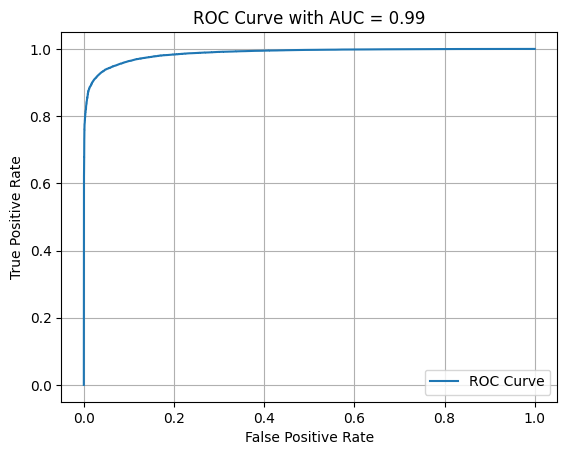

In [10]:


y_proba_test = best_rf.predict_proba(x_test7)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test7, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test7, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## DECISION TREE CLASSIFIER

In [11]:

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['gini', 'entropy']
}

# Utworzenie modelu drzewa decyzyjnego
tree = DecisionTreeClassifier()

# Uruchomienie Grid Search z walidacją krzyżową
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train7, y_train7)

# Wyświetlenie najlepszych parametrów i wyników
print("Najlepsze parametry:", grid_search.best_params_)
print("Najlepsza dokładność:", grid_search.best_score_)

# Utworzenie i ocena modelu z najlepszymi parametrami
best_tree = grid_search.best_estimator_
best_tree.fit(x_train7, y_train7)

ypred_train2 = best_tree.predict(x_train7)
ypred_test2 = best_tree.predict(x_test7)

# Ocena modelu na zbiorze testowym

print("Training Results\n")
print(classification_report(y_train7, ypred_train2))
print('Testing Results\n')
print(classification_report(y_test7, ypred_test2))

# Dodatkowo: Walidacja krzyżowa dla najlepszego modelu na całym zbiorze danych
cross_val_scores = cross_val_score(best_tree, x_train7, y_train7, cv=5)
print("Cross-Validation Scores for the Best Model:", cross_val_scores)
print("Average Cross-Validation Score:", cross_val_scores.mean())

Najlepsze parametry: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
Najlepsza dokładność: 0.921065794067778
Training Results

              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96     61548
         1.0       0.98      0.96      0.97     82116

    accuracy                           0.97    143664
   macro avg       0.96      0.97      0.97    143664
weighted avg       0.97      0.97      0.97    143664

Testing Results

              precision    recall  f1-score   support

         0.0       0.90      0.92      0.91     20567
         1.0       0.94      0.92      0.93     27322

    accuracy                           0.92     47889
   macro avg       0.92      0.92      0.92     47889
weighted avg       0.92      0.92      0.92     47889

Cross-Validation Scores for the Best Model: [0.92197125 0.92242369 0.92110117 0.92284133 0.91765279]
Average Cross-Validation Score: 0.9211980486046798


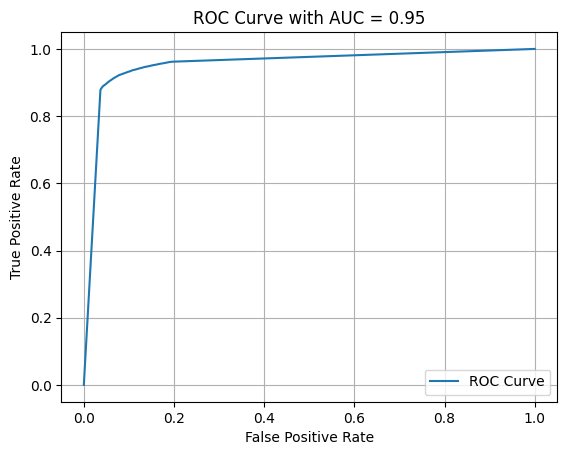

In [12]:

y_proba_test = best_tree.predict_proba(x_test7)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test7, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test7, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Naive Bayes

In [13]:
Gnb = GaussianNB()
Gnb.fit(x_train7, y_train7)
ypred_train3 = Gnb.predict(x_train7)
y_pred_test3 = Gnb.predict(x_test7)

print("Naive Bayes Classifier Accuracy: ",accuracy_score(y_test7, y_pred_test3))

Naive Bayes Classifier Accuracy:  0.8150305915763536


In [14]:
print("Training Results\n")
print(classification_report(y_train7, ypred_train3))

Training Results

              precision    recall  f1-score   support

         0.0       0.77      0.82      0.79     61548
         1.0       0.86      0.81      0.83     82116

    accuracy                           0.82    143664
   macro avg       0.81      0.82      0.81    143664
weighted avg       0.82      0.82      0.82    143664



In [15]:
print('Testing Results\n')
print(classification_report(y_test7, y_pred_test3))

Testing Results

              precision    recall  f1-score   support

         0.0       0.77      0.82      0.79     20567
         1.0       0.85      0.81      0.83     27322

    accuracy                           0.82     47889
   macro avg       0.81      0.82      0.81     47889
weighted avg       0.82      0.82      0.82     47889



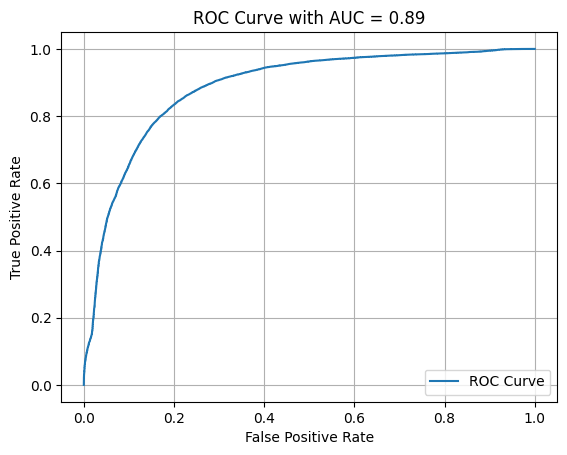

In [16]:

y_proba_test = Gnb.predict_proba(x_test7)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test7, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test7, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## XGBOSST

Najlepsze parametry:  {'colsample_bytree': 0.7, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.9}
Accuracy on Training set:  0.9554446486245685
Accuracy on Test set:  0.9418655641170206

Training Results

              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95     61548
         1.0       0.97      0.95      0.96     82116

    accuracy                           0.96    143664
   macro avg       0.95      0.96      0.95    143664
weighted avg       0.96      0.96      0.96    143664

Testing Results

              precision    recall  f1-score   support

         0.0       0.92      0.95      0.93     20567
         1.0       0.96      0.94      0.95     27322

    accuracy                           0.94     47889
   macro avg       0.94      0.94      0.94     47889
weighted avg       0.94      0.94      0.94     47889



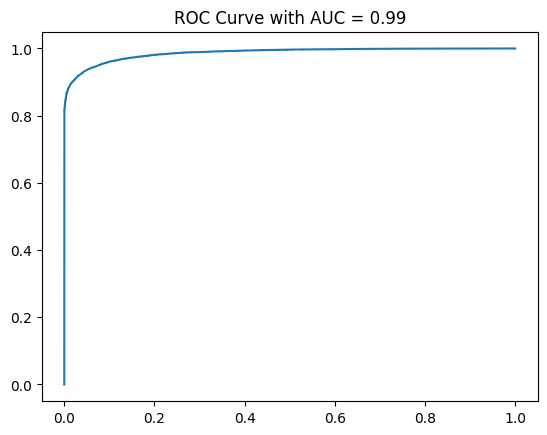

In [17]:

xg = XGBClassifier()

# Definiowanie siatki hiperparametrów do przetestowania
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Utworzenie obiektu GridSearchCV
grid_search = GridSearchCV(estimator=xg, param_grid=param_grid, cv=3, scoring='accuracy')

# Przeszukiwanie siatki parametrów
grid_search.fit(x_train7, y_train7)

# Najlepsze parametry i najlepszy model
print("Najlepsze parametry: ", grid_search.best_params_)
best_xg = grid_search.best_estimator_

# Predykcje na zbiorze treningowym i testowym
ypred_train4 = best_xg.predict(x_train7)
y_pred_test4 = best_xg.predict(x_test7)

# Ocena modelu
print("Accuracy on Training set: ", accuracy_score(y_train7, ypred_train4))
print("Accuracy on Test set: ", accuracy_score(y_test7, y_pred_test4))
print("\nTraining Results\n")
print(classification_report(y_train7, ypred_train4))
print('Testing Results\n')
print(classification_report(y_test7, y_pred_test4))

# Krzywa ROC
y_proba_test4 = best_xg.predict_proba(x_test7)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test7, y_proba_test4)
plt.plot(fpr, tpr)
plt.title("ROC Curve with AUC = {:.2f}".format(roc_auc_score(y_test7, y_proba_test4)))
plt.show()

## logistic regression

Najlepsze parametry:  {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy on Training set:  0.8508812228533245
Accuracy on Test set:  0.8490885171960157

Training Results

              precision    recall  f1-score   support

         0.0       0.85      0.80      0.82     61548
         1.0       0.85      0.89      0.87     82116

    accuracy                           0.85    143664
   macro avg       0.85      0.84      0.85    143664
weighted avg       0.85      0.85      0.85    143664

Testing Results

              precision    recall  f1-score   support

         0.0       0.85      0.79      0.82     20567
         1.0       0.85      0.89      0.87     27322

    accuracy                           0.85     47889
   macro avg       0.85      0.84      0.84     47889
weighted avg       0.85      0.85      0.85     47889



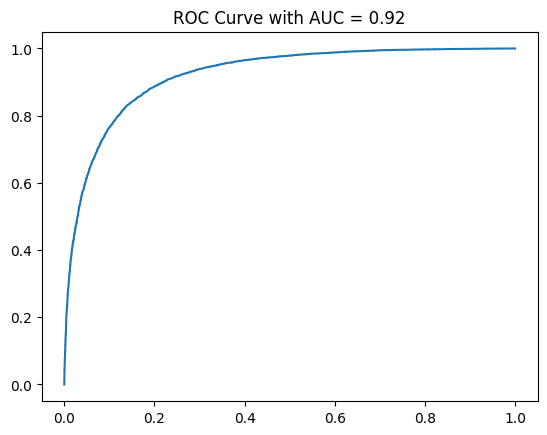

In [18]:

# Inicjalizacja modelu regresji logistycznej
lg = LogisticRegression()

# Definiowanie siatki hiperparametrów do przetestowania
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Parametr regularyzacji
    'penalty': ['l1', 'l2'],       # Typ regularyzacji
    'solver': ['liblinear']        # Algorytm optymalizacji (liblinear jest dobrym wyborem dla małych zbiorów danych)
}

# Utworzenie obiektu GridSearchCV
grid_search = GridSearchCV(estimator=lg, param_grid=param_grid, cv=5, scoring='accuracy')

# Przeszukiwanie siatki parametrów
grid_search.fit(x_train7, y_train7)

# Najlepsze parametry i najlepszy model
print("Najlepsze parametry: ", grid_search.best_params_)
best_lg = grid_search.best_estimator_

# Predykcje na zbiorze treningowym i testowym
ypred_train4 = best_lg.predict(x_train7)
y_pred_test4 = best_lg.predict(x_test7)

# Ocena modelu
print("Accuracy on Training set: ", accuracy_score(y_train7, ypred_train4))
print("Accuracy on Test set: ", accuracy_score(y_test7, y_pred_test4))
print("\nTraining Results\n")
print(classification_report(y_train7, ypred_train4))
print('Testing Results\n')
print(classification_report(y_test7, y_pred_test4))

# Krzywa ROC
y_proba_test4 = best_lg.predict_proba(x_test7)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test7, y_proba_test4)
plt.plot(fpr, tpr)
plt.title("ROC Curve with AUC = {:.2f}".format(roc_auc_score(y_test7, y_proba_test4)))
plt.show()

## GradientBoostingClassifier


Najlepsze parametry:  {'learning_rate': 0.2, 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 300}
Accuracy on Training set:  0.9710365853658537
Accuracy on Test set:  0.9429305268433252

Training Results

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     61548
         1.0       0.98      0.97      0.97     82116

    accuracy                           0.97    143664
   macro avg       0.97      0.97      0.97    143664
weighted avg       0.97      0.97      0.97    143664

Testing Results

              precision    recall  f1-score   support

         0.0       0.92      0.95      0.93     20567
         1.0       0.96      0.94      0.95     27322

    accuracy                           0.94     47889
   macro avg       0.94      0.94      0.94     47889
weighted avg       0.94      0.94      0.94     47889



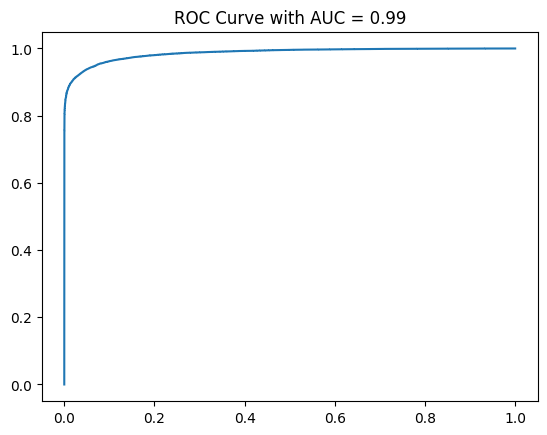

In [19]:


# Inicjalizacja modelu Gradient Boosting Classifier
gb = GradientBoostingClassifier()

# Definiowanie siatki hiperparametrów do przetestowania
param_grid = {
    'n_estimators': [100, 200, 300],  # Liczba drzew w ensemble
    'learning_rate': [0.01, 0.1, 0.2], # Szybkość uczenia
    'max_depth': [3, 5, 7],            # Maksymalna głębokość drzewa
    'min_samples_split': [2, 4],       # Minimalna liczba próbek wymagana do podziału węzła
    'min_samples_leaf': [1, 2]         # Minimalna liczba próbek w liściu
}

# Utworzenie obiektu GridSearchCV
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, scoring='accuracy')

# Przeszukiwanie siatki parametrów
grid_search.fit(x_train7, y_train7)

# Najlepsze parametry i najlepszy model
print("Najlepsze parametry: ", grid_search.best_params_)
best_gb = grid_search.best_estimator_

# Predykcje na zbiorze treningowym i testowym
ypred_train6 = best_gb.predict(x_train7)
y_pred_test6 = best_gb.predict(x_test7)

# Ocena modelu
print("Accuracy on Training set: ", accuracy_score(y_train7, ypred_train6))
print("Accuracy on Test set: ", accuracy_score(y_test7, y_pred_test6))
print("\nTraining Results\n")
print(classification_report(y_train7, ypred_train6))
print('Testing Results\n')
print(classification_report(y_test7, y_pred_test6))

# Krzywa ROC
y_proba_test6 = best_gb.predict_proba(x_test7)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test7, y_proba_test6)
plt.plot(fpr, tpr)
plt.title("ROC Curve with AUC = {:.2f}".format(roc_auc_score(y_test7, y_proba_test6)))
plt.show()

## KNN

In [20]:
knn = KNeighborsClassifier()
knn.fit(x_train7, y_train7)


KNeighborsClassifier()

In [21]:
grid_cv = GridSearchCV(KNeighborsClassifier(), 
                       param_grid={
                           "n_neighbors": range(1, 50)
                       }, cv=5, scoring="f1", 
                       verbose=1, n_jobs=6)


In [22]:
grid_cv.fit(x_train7, 
            y_train7)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=6,
             param_grid={'n_neighbors': range(1, 50)}, scoring='f1', verbose=1)

In [23]:
grid_cv.best_score_


0.9349975209230807

In [24]:
knn = grid_cv.best_estimator_
knn

KNeighborsClassifier(n_neighbors=1)

In [25]:
ypred_train6 = grid_cv.predict(x_train7)
y_pred_test6 = grid_cv.predict(x_test7)
print("XGBClassifier Accuracy: ",accuracy_score(y_test7, y_pred_test6))

XGBClassifier Accuracy:  0.9318632671385914


In [26]:
print("Training Results\n")
print(classification_report(y_train7, ypred_train6))

Training Results

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     61548
         1.0       1.00      1.00      1.00     82116

    accuracy                           1.00    143664
   macro avg       1.00      1.00      1.00    143664
weighted avg       1.00      1.00      1.00    143664



In [27]:
print('Testing Results\n')
print(classification_report(y_test7, y_pred_test6))

Testing Results

              precision    recall  f1-score   support

         0.0       0.94      0.90      0.92     20567
         1.0       0.93      0.95      0.94     27322

    accuracy                           0.93     47889
   macro avg       0.93      0.93      0.93     47889
weighted avg       0.93      0.93      0.93     47889



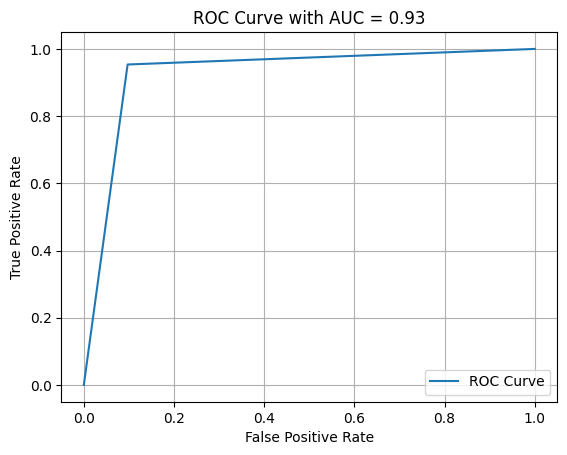

In [28]:

y_proba_test = grid_cv.predict_proba(x_test7)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test7, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test7, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## SIECI NEURONOWE

## ANN

In [29]:
ann = tf.keras.models.Sequential()

In [30]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)


In [31]:
ann.add(tf.keras.layers.Dense(units=14, activation='relu'))

In [32]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [33]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [34]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [35]:
ann.fit(x_train7, y_train7, batch_size = 32, epochs=100,
          validation_data=(x_test7, y_test7), verbose=1,
          callbacks=[early_stop])

Epoch 1/100


4490/4490 [==============================] - 6s 1ms/step - loss: 0.3594 - accuracy: 0.8401 - val_loss: 0.3190 - val_accuracy: 0.8646
Epoch 2/100
4490/4490 [==============================] - 5s 1ms/step - loss: 0.3056 - accuracy: 0.8721 - val_loss: 0.2991 - val_accuracy: 0.8742
Epoch 3/100
4490/4490 [==============================] - 5s 1ms/step - loss: 0.2889 - accuracy: 0.8784 - val_loss: 0.2855 - val_accuracy: 0.8803
Epoch 4/100
4490/4490 [==============================] - 5s 1ms/step - loss: 0.2759 - accuracy: 0.8832 - val_loss: 0.2720 - val_accuracy: 0.8842
Epoch 5/100
4490/4490 [==============================] - 5s 1ms/step - loss: 0.2661 - accuracy: 0.8873 - val_loss: 0.2637 - val_accuracy: 0.8885
Epoch 6/100
4490/4490 [==============================] - 5s 1ms/step - loss: 0.2596 - accuracy: 0.8897 - val_loss: 0.2585 - val_accuracy: 0.8897
Epoch 7/100
4490/4490 [==============================] - 5s 1ms/step - loss: 0.2544 - accuracy: 0.8914 - val_loss: 0.2546 - val_

In [36]:
ypred_train7 = ann.predict(x_train7)
y_pred_test7 = ann.predict(x_test7)

y_pred_test7 = (y_pred_test7 > 0.5)
ypred_train7 = (ypred_train7 > 0.5)
print(np.concatenate((y_pred_test7.reshape(len(y_pred_test7),1), y_test7.reshape(len(y_test7),1)),1))

1497/1497 [==============================] - 1s 749us/step
[[0. 0.]
 [1. 1.]
 [1. 0.]
 ...
 [1. 1.]
 [0. 0.]
 [0. 0.]]


In [37]:
accuracy_score(y_test7, y_pred_test7)

0.9103760780137401

In [38]:
print("Training Results\n")
print(classification_report(y_train7, ypred_train7))

Training Results

              precision    recall  f1-score   support

         0.0       0.92      0.88      0.90     61548
         1.0       0.91      0.94      0.92     82116

    accuracy                           0.91    143664
   macro avg       0.91      0.91      0.91    143664
weighted avg       0.91      0.91      0.91    143664



In [39]:
print('Testing Results\n')
print(classification_report(y_test7, y_pred_test7))

Testing Results

              precision    recall  f1-score   support

         0.0       0.92      0.87      0.89     20567
         1.0       0.91      0.94      0.92     27322

    accuracy                           0.91     47889
   macro avg       0.91      0.91      0.91     47889
weighted avg       0.91      0.91      0.91     47889



1497/1497 [==============================] - 1s 761us/step


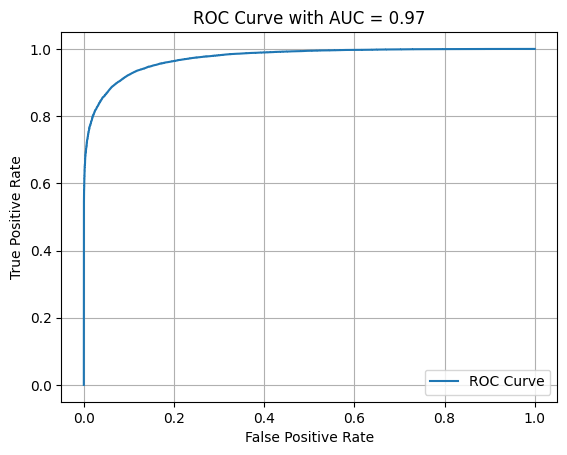

In [40]:

y_proba_test = ann.predict(x_test7).flatten()

fpr, tpr, thresholds = roc_curve(y_test7, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test7, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## inne próby sieci neuronowych 

In [41]:

tf.random.set_seed(42)



model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(14,activation = 'relu'),
  tf.keras.layers.Dense(6,activation = 'relu'),
  tf.keras.layers.Dense(6,activation = 'relu'),
  tf.keras.layers.Dense(1,activation = 'sigmoid')                            
])


model_2.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics = ['accuracy'])


history_2 = model_2.fit(x_train7,y_train7,epochs = 100)

Epoch 1/100
4490/4490 [==============================] - 5s 972us/step - loss: 0.3416 - accuracy: 0.8546
Epoch 2/100
4490/4490 [==============================] - 4s 959us/step - loss: 0.2903 - accuracy: 0.8789
Epoch 3/100
4490/4490 [==============================] - 4s 922us/step - loss: 0.2648 - accuracy: 0.8905
Epoch 4/100
4490/4490 [==============================] - 4s 905us/step - loss: 0.2489 - accuracy: 0.8973
Epoch 5/100
4490/4490 [==============================] - 4s 914us/step - loss: 0.2396 - accuracy: 0.9003
Epoch 6/100
4490/4490 [==============================] - 4s 913us/step - loss: 0.2336 - accuracy: 0.9027
Epoch 7/100
4490/4490 [==============================] - 4s 910us/step - loss: 0.2293 - accuracy: 0.9030
Epoch 8/100
4490/4490 [==============================] - 4s 913us/step - loss: 0.2259 - accuracy: 0.9057
Epoch 9/100
4490/4490 [==============================] - 4s 897us/step - loss: 0.2228 - accuracy: 0.9065
Epoch 10/100
4490/4490 [==============================]

In [42]:
model_2.evaluate(x_test7,y_test7)

1497/1497 [==============================] - 1s 860us/step - loss: 0.2026 - accuracy: 0.9126


[0.20261864364147186, 0.9125895500183105]

In [43]:
ypred_train10 = model_2.predict(x_train7)
y_pred_test10 = model_2.predict(x_test7)

y_pred_test10 = (y_pred_test10 > 0.5)
ypred_train10 = (ypred_train10 > 0.5)

print(classification_report(y_train7,ypred_train10))
print(classification_report(y_test7,y_pred_test10))

1497/1497 [==============================] - 1s 834us/step
              precision    recall  f1-score   support

         0.0       0.89      0.92      0.90     61548
         1.0       0.94      0.92      0.93     82116

    accuracy                           0.92    143664
   macro avg       0.91      0.92      0.92    143664
weighted avg       0.92      0.92      0.92    143664

              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90     20567
         1.0       0.93      0.91      0.92     27322

    accuracy                           0.91     47889
   macro avg       0.91      0.91      0.91     47889
weighted avg       0.91      0.91      0.91     47889



1497/1497 [==============================] - 1s 837us/step


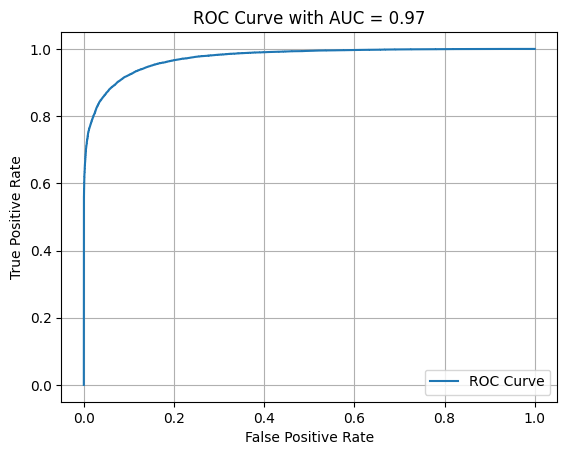

In [44]:

y_proba_test = model_2.predict(x_test7).flatten()

fpr, tpr, thresholds = roc_curve(y_test7, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test7, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## inna proba 

In [45]:

tf.random.set_seed(42)



model_22 = tf.keras.Sequential([
  tf.keras.layers.Dense(18,activation = 'relu'),
  tf.keras.layers.Dense(36,activation = 'relu'),
  tf.keras.layers.Dense(18,activation = 'relu'),
  tf.keras.layers.Dense(9,activation = 'relu'),
  tf.keras.layers.Dense(1,activation = 'sigmoid')                            
])


model_22.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics = ['accuracy'])


history_2 = model_22.fit(x_train7,y_train7,epochs = 100)

Epoch 1/100
4490/4490 [==============================] - 5s 1ms/step - loss: 0.3255 - accuracy: 0.8624
Epoch 2/100
4490/4490 [==============================] - 5s 1ms/step - loss: 0.2739 - accuracy: 0.8861
Epoch 3/100
4490/4490 [==============================] - 5s 1ms/step - loss: 0.2511 - accuracy: 0.8956
Epoch 4/100
4490/4490 [==============================] - 5s 1ms/step - loss: 0.2388 - accuracy: 0.9004
Epoch 5/100
4490/4490 [==============================] - 4s 981us/step - loss: 0.2328 - accuracy: 0.9030
Epoch 6/100
4490/4490 [==============================] - 4s 992us/step - loss: 0.2287 - accuracy: 0.9040
Epoch 7/100
4490/4490 [==============================] - 4s 962us/step - loss: 0.2258 - accuracy: 0.9046
Epoch 8/100
4490/4490 [==============================] - 4s 916us/step - loss: 0.2228 - accuracy: 0.9062
Epoch 9/100
4490/4490 [==============================] - 4s 949us/step - loss: 0.2207 - accuracy: 0.9068
Epoch 10/100
4490/4490 [==============================] - 4s 94

In [46]:
model_22.evaluate(x_test7,y_test7)

1497/1497 [==============================] - 1s 815us/step - loss: 0.1988 - accuracy: 0.9147


[0.19878937304019928, 0.9147194623947144]

In [47]:
ypred_train22 = model_22.predict(x_train7)
y_pred_test22 = model_22.predict(x_test7)

y_pred_test22 = (y_pred_test22 > 0.5)
ypred_train22 = (ypred_train22 > 0.5)

print(classification_report(y_train7,ypred_train22))
print(classification_report(y_test7,y_pred_test22))

1497/1497 [==============================] - 1s 780us/step
              precision    recall  f1-score   support

         0.0       0.89      0.92      0.91     61548
         1.0       0.94      0.92      0.93     82116

    accuracy                           0.92    143664
   macro avg       0.92      0.92      0.92    143664
weighted avg       0.92      0.92      0.92    143664

              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90     20567
         1.0       0.93      0.92      0.92     27322

    accuracy                           0.91     47889
   macro avg       0.91      0.91      0.91     47889
weighted avg       0.92      0.91      0.91     47889



1497/1497 [==============================] - 1s 781us/step


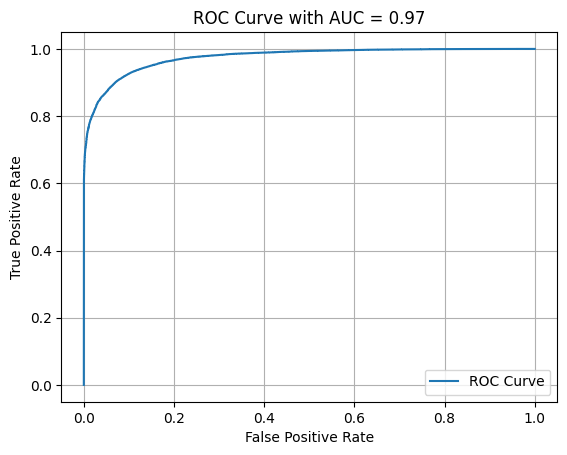

In [48]:

y_proba_test = model_22.predict(x_test7).flatten()

fpr, tpr, thresholds = roc_curve(y_test7, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test7, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## inne próby sieci neuronowych 

In [49]:
model1 = Sequential()
model1.add(Dense(units=30,activation='relu'))
model1.add(Dropout(0.5))

model1.add(Dense(units=15,activation='relu'))
model1.add(Dropout(0.5))

model1.add(Dense(units=1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='adam')

In [50]:
model1.fit(x=x_train7, 
          y=y_train7, 
          epochs=100,
          validation_data=(x_test7, y_test7), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/100
4490/4490 [==============================] - 6s 1ms/step - loss: 0.4314 - val_loss: 0.3328
Epoch 2/100
4490/4490 [==============================] - 5s 1ms/step - loss: 0.3748 - val_loss: 0.3213
Epoch 3/100
4490/4490 [==============================] - 5s 1ms/step - loss: 0.3624 - val_loss: 0.3146
Epoch 4/100
4490/4490 [==============================] - 5s 1ms/step - loss: 0.3572 - val_loss: 0.3066
Epoch 5/100
4490/4490 [==============================] - 5s 1ms/step - loss: 0.3529 - val_loss: 0.3039
Epoch 6/100
4490/4490 [==============================] - 5s 1ms/step - loss: 0.3514 - val_loss: 0.3015
Epoch 7/100
4490/4490 [==============================] - 5s 1ms/step - loss: 0.3498 - val_loss: 0.3017
Epoch 8/100
4490/4490 [==============================] - 5s 1ms/step - loss: 0.3487 - val_loss: 0.3015
Epoch 9/100
4490/4490 [==============================] - 5s 1ms/step - loss: 0.3462 - val_loss: 0.2990
Epoch 10/100
4490/4490 [==============================] - 5s 1ms/step - l

In [51]:

predictions = model1.predict(x_test7)

ypred_train11 = model1.predict(x_train7)
y_pred_test11 = model1.predict(x_test7)

y_pred_test11 = (y_pred_test11 > 0.5)
ypred_train11 = (ypred_train11 > 0.5)


print("Training Results\n")
print(classification_report(y_train7,ypred_train11))
print("Testing Results\n")
print(classification_report(y_test7,y_pred_test11))

1497/1497 [==============================] - 1s 763us/step
Training Results

              precision    recall  f1-score   support

         0.0       0.88      0.84      0.86     61548
         1.0       0.88      0.91      0.90     82116

    accuracy                           0.88    143664
   macro avg       0.88      0.88      0.88    143664
weighted avg       0.88      0.88      0.88    143664

Testing Results

              precision    recall  f1-score   support

         0.0       0.88      0.84      0.86     20567
         1.0       0.88      0.91      0.90     27322

    accuracy                           0.88     47889
   macro avg       0.88      0.88      0.88     47889
weighted avg       0.88      0.88      0.88     47889



1497/1497 [==============================] - 1s 758us/step


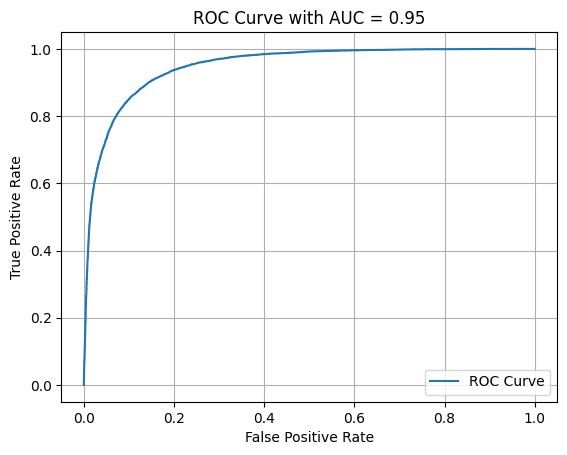

In [52]:

y_proba_test = model1.predict(x_test7).flatten()

fpr, tpr, thresholds = roc_curve(y_test7, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test7, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## inny model

In [53]:
model2 = Sequential()


model2.add(Dense(14,  activation='relu'))
model2.add(Dropout(0.2))

model2.add(Dense(10, activation='relu'))
model2.add(Dropout(0.2))

model2.add(Dense(units=1,activation='sigmoid'))

model2.compile(loss='binary_crossentropy', optimizer='adam')

In [54]:
model2.fit(x=x_train7, 
          y=y_train7, 
          epochs=100,
          validation_data=(x_test7, y_test7), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/100
4490/4490 [==============================] - 6s 1ms/step - loss: 0.4168 - val_loss: 0.3417
Epoch 2/100
4490/4490 [==============================] - 5s 1ms/step - loss: 0.3604 - val_loss: 0.3257
Epoch 3/100
4490/4490 [==============================] - 5s 1ms/step - loss: 0.3495 - val_loss: 0.3206
Epoch 4/100
4490/4490 [==============================] - 5s 1ms/step - loss: 0.3452 - val_loss: 0.3174
Epoch 5/100
4490/4490 [==============================] - 5s 1ms/step - loss: 0.3416 - val_loss: 0.3135
Epoch 6/100
4490/4490 [==============================] - 5s 1ms/step - loss: 0.3418 - val_loss: 0.3118
Epoch 7/100
4490/4490 [==============================] - 5s 1ms/step - loss: 0.3389 - val_loss: 0.3090
Epoch 8/100
4490/4490 [==============================] - 5s 1ms/step - loss: 0.3364 - val_loss: 0.3077
Epoch 9/100
4490/4490 [==============================] - 5s 1ms/step - loss: 0.3344 - val_loss: 0.3046
Epoch 10/100
4490/4490 [==============================] - 5s 1ms/step - l

In [55]:
ypred_train12 = model2.predict(x_train7)
y_pred_test12 = model2.predict(x_test7)

y_pred_test12 = (y_pred_test12 > 0.5)
ypred_train12 = (ypred_train12 > 0.5)

print(classification_report(y_train7,ypred_train12))
print(classification_report(y_test7,y_pred_test12))

1497/1497 [==============================] - 1s 765us/step
              precision    recall  f1-score   support

         0.0       0.87      0.84      0.86     61548
         1.0       0.89      0.90      0.90     82116

    accuracy                           0.88    143664
   macro avg       0.88      0.87      0.88    143664
weighted avg       0.88      0.88      0.88    143664

              precision    recall  f1-score   support

         0.0       0.87      0.84      0.86     20567
         1.0       0.88      0.91      0.90     27322

    accuracy                           0.88     47889
   macro avg       0.88      0.87      0.88     47889
weighted avg       0.88      0.88      0.88     47889



1497/1497 [==============================] - 1s 788us/step


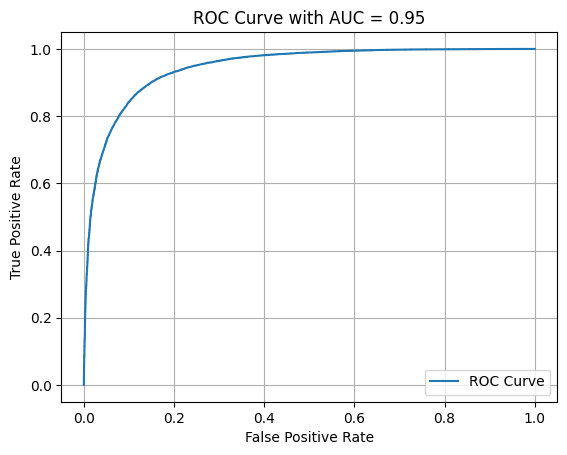

In [56]:

y_proba_test = model2.predict(x_test7).flatten()

fpr, tpr, thresholds = roc_curve(y_test7, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test7, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## SVC

In [57]:
model3 = SVC(probability=True)

In [58]:
model3.fit(x_train7,y_train7)

SVC(probability=True)

In [59]:
ypred_train14 = model3.predict(x_train7)
y_pred_test14 = model3.predict(x_test7)


print(classification_report(y_train7,ypred_train14))
print(classification_report(y_test7,y_pred_test14))

              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90     61548
         1.0       0.93      0.91      0.92     82116

    accuracy                           0.91    143664
   macro avg       0.91      0.91      0.91    143664
weighted avg       0.92      0.91      0.91    143664

              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90     20567
         1.0       0.93      0.91      0.92     27322

    accuracy                           0.91     47889
   macro avg       0.91      0.91      0.91     47889
weighted avg       0.91      0.91      0.91     47889



In [60]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [61]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [62]:
grid.fit(x_train7,y_train7)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.898 total time= 2.9min
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.897 total time= 2.9min
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.899 total time= 2.9min
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.897 total time= 2.9min
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.898 total time= 2.9min
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.879 total time= 3.3min
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.879 total time= 3.5min
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.880 total time= 3.7min
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.879 total time= 3.4min
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.880 total time= 3.8min
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.848 total time= 4.7min
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [63]:
grid.best_params_

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}

In [64]:
grid.best_estimator_

SVC(C=1000, gamma=1)

In [65]:
ypred_train = grid.predict(x_train7)
y_pred_test = grid.predict(x_test7)


print(classification_report(y_train7,ypred_train))
print(classification_report(y_test7,y_pred_test))

              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94     61548
         1.0       0.96      0.95      0.95     82116

    accuracy                           0.95    143664
   macro avg       0.95      0.95      0.95    143664
weighted avg       0.95      0.95      0.95    143664

              precision    recall  f1-score   support

         0.0       0.90      0.92      0.91     20567
         1.0       0.94      0.93      0.93     27322

    accuracy                           0.92     47889
   macro avg       0.92      0.92      0.92     47889
weighted avg       0.92      0.92      0.92     47889



Training Results

              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94     61548
         1.0       0.96      0.95      0.95     82116

    accuracy                           0.95    143664
   macro avg       0.95      0.95      0.95    143664
weighted avg       0.95      0.95      0.95    143664

Testing Results

              precision    recall  f1-score   support

         0.0       0.90      0.92      0.91     20567
         1.0       0.94      0.93      0.93     27322

    accuracy                           0.92     47889
   macro avg       0.92      0.92      0.92     47889
weighted avg       0.92      0.92      0.92     47889



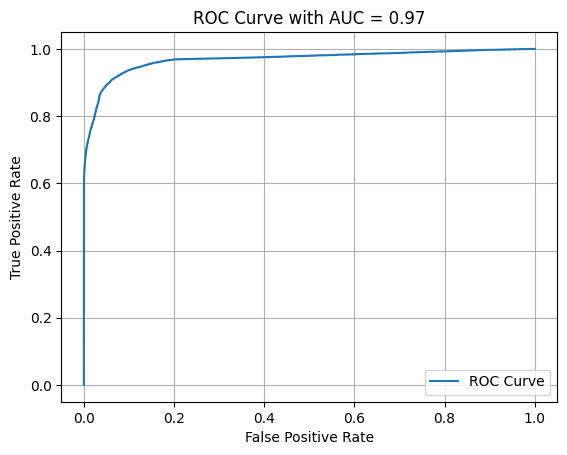

In [67]:
model3 = SVC(C=1000, gamma=1, kernel='rbf', probability=True)
model3.fit(x_train7, y_train7)

ypred_train14 = model3.predict(x_train7)
y_pred_test14 = model3.predict(x_test7)

print("Training Results\n")
print(classification_report(y_train7, ypred_train14))
print("Testing Results\n")
print(classification_report(y_test7, y_pred_test14))

y_proba_test = model3.predict_proba(x_test7)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test7, y_proba_test)
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test7, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()